In [1]:
import cv2
import matplotlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from PIL import ImageFilter, Image




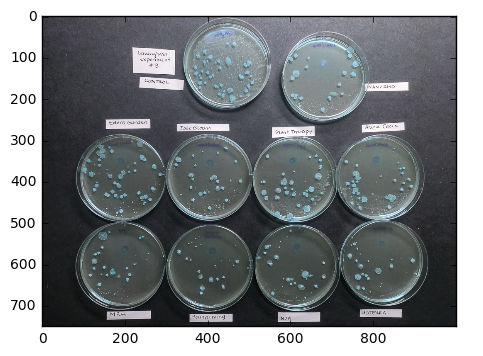

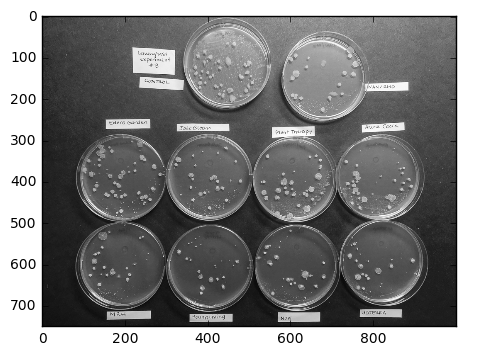

In [2]:
testimag = Image.open('petri.jpg')

image = cv2.imread('petri.jpg')
output = image.copy()
plt.imshow(image)
plt.show()
gray = cv2.cvtColor(output, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')
plt.show()



# applying image filters
# grayenhanced = testimag.ImageFilter(ImageFilter.EDGE_ENHANCE)
# plt.imshow(grayenhanced,cmap='gray')
# plt.show()
#testimag.ImageFilter(ImageFilter.EDGE_ENHANCE).show()

In [3]:
# Attempting to do image recognition
# detect circles in the image
rawcircles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 0.6, 190)
#rawcircles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1.2, 100)


In [4]:
circles = rawcircles# ensure at least some circles were found
if circles is not None:
    # convert the (x, y) coordinates and radius of the circles to integers
    circles = np.round(circles[0, :]).astype("int")

    # loop over the (x, y) coordinates and radius of the circles
    for (x, y, r) in circles:
        # draw the circle in the output image, then draw a rectangle
        # corresponding to the center of the circle
        cv2.circle(output, (x, y), r, (0, 255, 0), 4)
        cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)

    # show the output image
    cv2.imshow("output", np.hstack([image, output]))
    cv2.waitKey(10000)
    cv2.waitKey(1)
    cv2.destroyAllWindows()
    cv2.waitKey(1)

In [4]:
def radfilter(rawcircles, radmin, radmax):
    """Filter function to take an array of circles and filter out circles which are larger or smaller than
    two given radii"""
    
    newcircles = rawcircles[0][(rawcircles[0][:,2]>radmin)&(rawcircles[0][:,2]<radmax)]
    return newcircles

In [7]:
rawcircles

array([[[ 446.5       ,  116.5       ,   99.30004883],
        [ 684.5       ,  149.5       ,  102.96844482],
        [ 403.5       ,  387.5       ,   96.87362671],
        [ 611.5       ,  399.5       ,  101.09648895],
        [ 817.5       ,  397.5       ,   89.60189819],
        [ 823.5       ,  596.5       ,  104.45333862],
        [ 186.5       ,  607.5       ,  106.66067505],
        [ 611.5       ,  610.5       ,   98.60273743],
        [ 406.5       ,  603.5       ,   99.51130676],
        [ 197.5       ,  389.5       ,   98.95706177],
        [ 265.5       ,  206.5       ,  116.17443848]]], dtype=float32)

In [12]:
subcircles = radfilter(rawcircles,80,110)
circles = np.array(subcircles[6:7])

In [15]:
# ensure at least some circles were found

if circles is not None:
    # convert the (x, y) coordinates and radius of the circles to integers
    # loop over the (x, y) coordinates and radius of the circles
    output = image.copy()
    for (x, y, r) in circles.astype("int"):
        # draw the circle in the output image, then draw a rectangle
        # corresponding to the center of the circle
        cv2.circle(output, (x, y), r, (0, 255, 0), 4)
        cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)

    # show the output image
    cv2.imshow("output", np.hstack([image, output]))
    cv2.waitKey(10000)
    cv2.waitKey(1)
    cv2.destroyAllWindows()
    cv2.waitKey(1)

In [14]:
circles

array([[ 186.5       ,  607.5       ,  106.66067505]], dtype=float32)